In [ ]:
from tensorflow.python.client import device_lib 

print("Show System RAM Memory:\n\n") 

!cat /proc/meminfo | egrep "MemTotal*" 

print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13302920 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16547341160210465649
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2411453900885105868
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import time 

start = time.time() 

!python3 "/content/gdrive/MyDrive/ANLY 535/mnist_cnn.py" 

end = time.time() 

print(end - start)

#

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2022-01-30 18:59:06.033399: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/12
375/375 [==============================] - 15s 16ms/step - loss: 0.2648 - accuracy: 0.9211 - val_loss: 0.0688 - val_accuracy: 0.9800
Epoch 2/12
375/375 [==============================] - 6s 16ms/step - loss: 0.0927 - accuracy: 0.9723 - val_loss: 0.0494 - val_accuracy: 0.9858
Epoch 3/12
375/375 [==============================] - 6s 15ms/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0454 - val_accuracy: 0.9868
Epoch 4/12
375/375 [==============================] - 6s 15ms/step - loss: 0.0530 - accuracy: 0.9842 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 5/12
375/375 [==============================] - 6s 16ms/step - lo

In [ ]:

import tensorflow as tf

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Dropout, Flatten 

from tensorflow.keras.layers import Conv2D, MaxPooling2D 

from tensorflow.keras import backend as K 

batch_size = 128 

num_classes = 10 

epochs = 12 

# input image dimensions 

img_rows, img_cols = 28, 28 

# the data, split between train and test sets 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
if K.image_data_format() == 'channels_first': 

  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 

  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 

  input_shape = (1, img_rows, img_cols) 

else: 

  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 

  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 

  input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32') 

x_test = x_test.astype('float32') 

x_train /= 255 

x_test /= 255 

print('x_train shape:', x_train.shape) 

print(x_train.shape[0], 'train samples') 

print(x_test.shape[0], 'test samples') 

# convert class vectors to binary class matrices 

y_train = tf.keras.utils.to_categorical(y_train, num_classes) 

y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
#Q2- Explain the way that this model is designed. Talk about all the layers and their functionality.
#The batch size is 128 and epochs is 12. The input data is 28 X 28 pixels. The data is split between test and training dataset. The CNN model has sequential layers, the first layer is input layer with 3 by 3 kernel size andrelu activation. Second layer is convolutional with relu activation. Third layer is a pooling layer which returns themaximum value in pool. The model has 0.25 dropout. 
#Next layer is a hidden layer. Last layer is fully connectedlayer which generates a classification output.

In [ ]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

nn_fit = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=2,validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 - 11s - loss: 0.2646 - accuracy: 0.9185 - val_loss: 0.0631 - val_accuracy: 0.9818 - 11s/epoch - 28ms/step
Epoch 2/12
375/375 - 6s - loss: 0.0909 - accuracy: 0.9726 - val_loss: 0.0470 - val_accuracy: 0.9858 - 6s/epoch - 17ms/step
Epoch 3/12
375/375 - 6s - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0440 - val_accuracy: 0.9868 - 6s/epoch - 15ms/step
Epoch 4/12
375/375 - 5s - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0419 - val_accuracy: 0.9882 - 5s/epoch - 14ms/step
Epoch 5/12
375/375 - 5s - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0450 - val_accuracy: 0.9879 - 5s/epoch - 14ms/step
Epoch 6/12
375/375 - 5s - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9889 - 5s/epoch - 14ms/step
Epoch 7/12
375/375 - 5s - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0449 - val_accuracy: 0.9868 - 5s/epoch - 14ms/step
Epoch 8/12
375/375 - 7s - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0409 - val_accuracy: 0.9894 - 7s/epoch - 18ms/step
Epoch 9/12
375

In [ ]:
#Q3- Design the learning curve and talk about what you see.

scores = model.evaluate(x_test, y_test, verbose=2)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))


313/313 - 1s - loss: 0.0295 - accuracy: 0.9919 - 1s/epoch - 5ms/step
Baseline Error: 0.81%
Baseline Accuracy: 99.19%


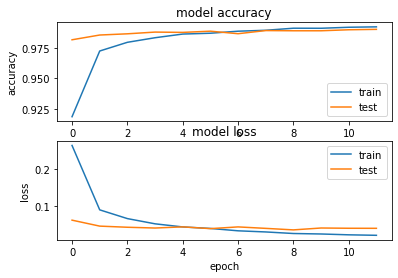

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(nn_fit.history['accuracy'])
plt.plot(nn_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(nn_fit.history['loss'])
plt.plot(nn_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#The first graph shows the model accuracy of each epoch, the second graph shows the model loss for eachepoch. Training data is more accurate than test data.

In [18]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/ANLY 535/amazon_cells_labelled.txt',names=['sentence', 'label'], sep='\t')

In [19]:
print
(
df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object

In [20]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_


{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [24]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [25]:
from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)



In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.796


In [30]:

X_train = vectorizer.transform(sentences_train).toarray()
X_test = vectorizer.transform(sentences_test).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim = X_train.shape[1] # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=100, validation_split=0.2 ,batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 1s 7ms/step - loss: 0.6846 - accuracy: 0.5917 - val_loss: 0.6744 - val_accuracy: 0.7000
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.8317 - val_loss: 0.6450 - val_accuracy: 0.7800
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.9017 - val_loss: 0.6000 - val_accuracy: 0.8133
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.9433 - val_loss: 0.5484 - val_accuracy: 0.8267
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.9583 - val_loss: 0.5046 - val_accuracy: 0.8400
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.9733 - val_loss: 0.4710 - val_accuracy: 0.8400
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.9783 - val_loss: 0.4447 - val_accuracy: 0.8467
Epoch 8/100
6

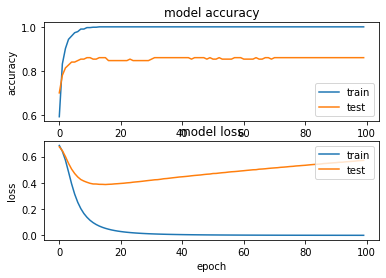

In [31]:

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Q4- Explain these graphs. If you see any issue, suggest a solution to resolve it. Make the model by creating 3hidden layers (first one 200 nodes, second one 100 nodes and last one 50 nodes and after each step, adddropout of 0.2 and report the accuracy. If you don’t see a huge improvement, don’t worry we are not done withthe model yet.
After around 15 epoch, the loss increases, indicating overfitting, may add regularization such as dropout to fix it.

In [32]:

model_2 = Sequential()
model_2.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(layers.Dense(50, input_dim=input_dim, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(layers.Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
hist_2 = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2 ,batch_size=10)
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 2s 13ms/step - loss: 0.6835 - accuracy: 0.5917 - val_loss: 0.6509 - val_accuracy: 0.7133
Epoch 2/100
60/60 [==============================] - 1s 8ms/step - loss: 0.4676 - accuracy: 0.8417 - val_loss: 0.4677 - val_accuracy: 0.8133
Epoch 3/100
60/60 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 0.9667 - val_loss: 0.5140 - val_accuracy: 0.8133
Epoch 4/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0233 - accuracy: 0.9967 - val_loss: 0.5971 - val_accuracy: 0.8067
Epoch 5/100
60/60 [==============================] - 0s 8ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.6054 - val_accuracy: 0.8333
Epoch 6/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.6086 - val_accuracy: 0.8267
Epoch 7/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6236 - val_accuracy: 0.8200
Epoch 8/100


In [33]:

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index
print(sentences_train[3])
print(X_train[3])

This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


In [35]:
for word in ['the', 'all', 'happy']:print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [37]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
# Pad variables with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [40]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy' ] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           78700     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


In [41]:
hist = model.fit(X_train, y_train,
epochs=50,
validation_split=0.2,
batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: ",accuracy)

Epoch 1/50
60/60 [==============================] - 2s 13ms/step - loss: 0.6917 - accuracy: 0.5917 - val_loss: 0.6886 - val_accuracy: 0.6333
Epoch 2/50
60/60 [==============================] - 0s 8ms/step - loss: 0.6789 - accuracy: 0.6367 - val_loss: 0.6746 - val_accuracy: 0.6133
Epoch 3/50
60/60 [==============================] - 1s 8ms/step - loss: 0.6432 - accuracy: 0.8217 - val_loss: 0.6385 - val_accuracy: 0.7067
Epoch 4/50
60/60 [==============================] - 0s 7ms/step - loss: 0.5557 - accuracy: 0.9117 - val_loss: 0.5762 - val_accuracy: 0.7200
Epoch 5/50
60/60 [==============================] - 0s 8ms/step - loss: 0.4293 - accuracy: 0.9433 - val_loss: 0.5089 - val_accuracy: 0.7733
Epoch 6/50
60/60 [==============================] - 1s 9ms/step - loss: 0.2946 - accuracy: 0.9700 - val_loss: 0.4448 - val_accuracy: 0.8067
Epoch 7/50
60/60 [==============================] - 1s 8ms/step - loss: 0.1876 - accuracy: 0.9783 - val_loss: 0.4023 - val_accuracy: 0.8200
Epoch 8/50
60/60 [=

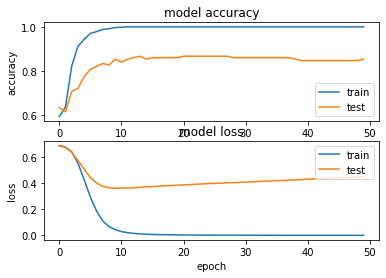

In [42]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Q5- How do you interpret these results?
The accuracy is higher than the previous model, but is it still showing overfitting.
Q6- What is your recommendation to improve the accuracy? Implement your idea.
We should add dropout and more epoches to the model.

In [44]:
embedding_dim = 50
model_3 = Sequential()
model_3.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model_3.add(layers.GlobalMaxPool1D())
model_3.add(layers.Dense(10, activation='relu'))
model_3.add(Dropout(0.15))
model_3.add(layers.Dense(1, activation='sigmoid'))
model_3.add(Dropout(0.15))
model_3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           78700     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
 dropout_6 (Dropout)         (None, 1)                 0         
                                                      

In [46]:
hist_3 = model_3.fit(X_train, y_train,
epochs=100,
validation_split=0.2,
batch_size=10)
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=False)
print("Accuracy: ",accuracy)

Epoch 1/100
60/60 [==============================] - 2s 23ms/step - loss: 1.9015 - accuracy: 0.4850 - val_loss: 0.6863 - val_accuracy: 0.5133
Epoch 2/100
60/60 [==============================] - 1s 10ms/step - loss: 1.9310 - accuracy: 0.5500 - val_loss: 0.6694 - val_accuracy: 0.5867
Epoch 3/100
60/60 [==============================] - 1s 8ms/step - loss: 1.5434 - accuracy: 0.7433 - val_loss: 0.6176 - val_accuracy: 0.7600
Epoch 4/100
60/60 [==============================] - 1s 8ms/step - loss: 1.6722 - accuracy: 0.8200 - val_loss: 0.5516 - val_accuracy: 0.7800
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 1.3594 - accuracy: 0.8817 - val_loss: 0.4896 - val_accuracy: 0.7933
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 1.4420 - accuracy: 0.8867 - val_loss: 0.4441 - val_accuracy: 0.8200
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 1.1510 - accuracy: 0.9017 - val_loss: 0.4184 - val_accuracy: 0.8267
Epoch 8/100

In [47]:
%shell jupyter nbconvert --to html '//content/gdrive/My Drive/Colab Notebooks/Test.ipynb'

[NbConvertApp] Converting notebook //content/gdrive/My Drive/Colab Notebooks/Test.ipynb to html
[NbConvertApp] Writing 464636 bytes to //content/gdrive/My Drive/Colab Notebooks/Test.html
